In [1]:
from preprocess_functions import channel_mixture_A, channel_mixture_B, channel_mixture_C, adaptiveIQR, zscale, iqr_clipped, iqr_log, raw_file
from preprocess_functions import _median_column_subtraction, _median_row_subtraction, _background_subtract

from astropy.io import fits
import numpy as np

import numpy as np
import matplotlib.pyplot as plt


/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


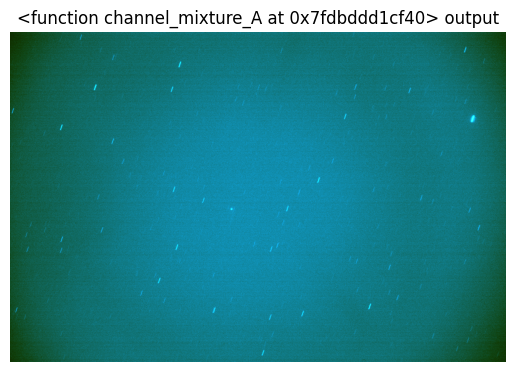

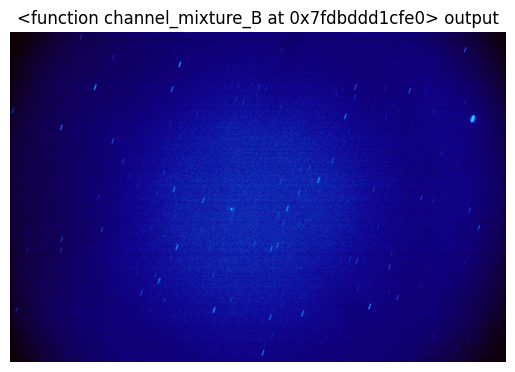

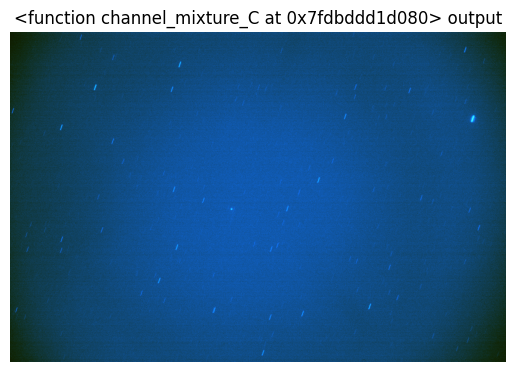

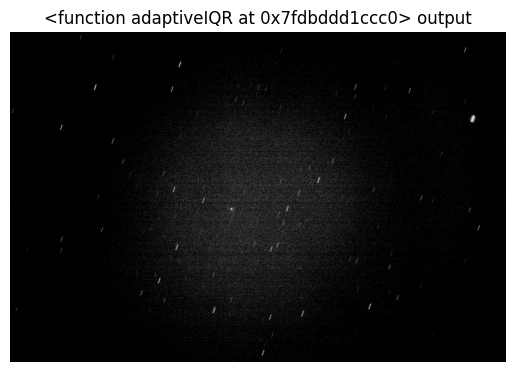

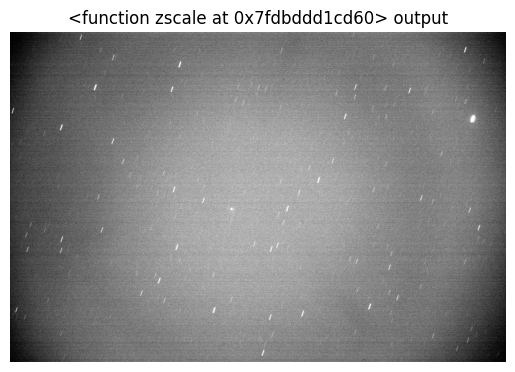

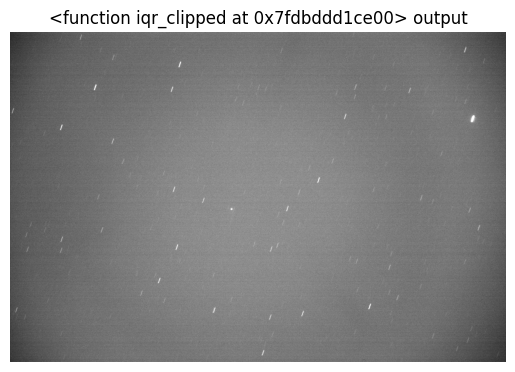

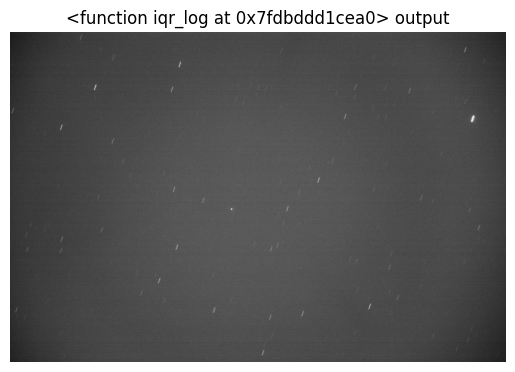

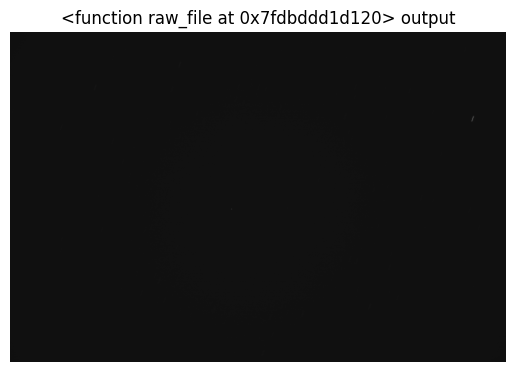

In [2]:
path = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/LMNT02Sat-2024-09-06/raw_fits/7983533270344115706.fits"
hdu = fits.open(path)
hdul = hdu[0]
data = hdul.data

images = [channel_mixture_A(data), channel_mixture_B(data), channel_mixture_C(data), adaptiveIQR(data), zscale(data), iqr_clipped(data), iqr_log(data), raw_file(data)]
functions = [channel_mixture_A, channel_mixture_B, channel_mixture_C, adaptiveIQR, zscale, iqr_clipped, iqr_log, raw_file]

for i, img in enumerate(images):
    # Convert to HWC for matplotlib
    img_hwc = np.transpose(img, (1, 2, 0))

    # Plot
    plt.imshow(img_hwc)
    plt.axis('off')
    plt.title(f"{functions[i]} output")
    plt.show()


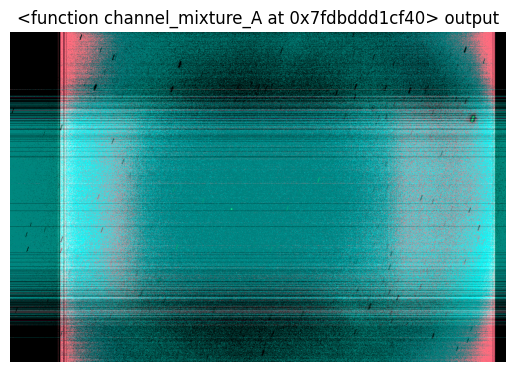

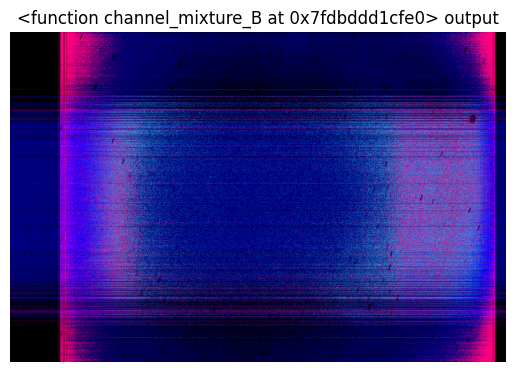

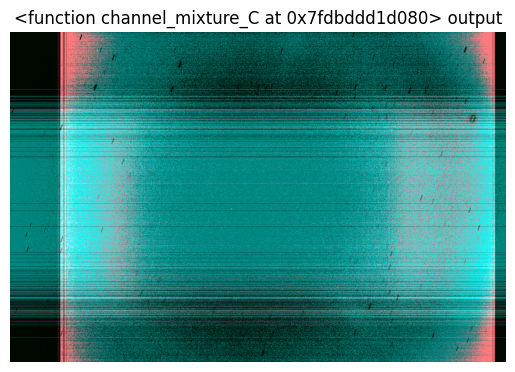

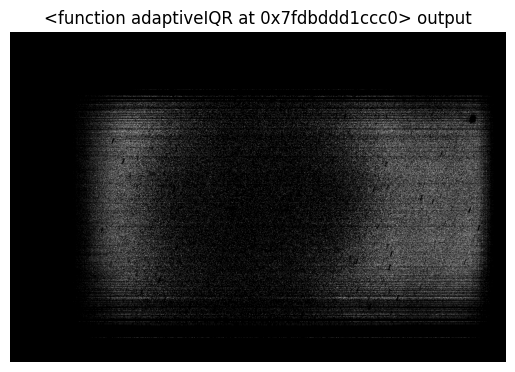

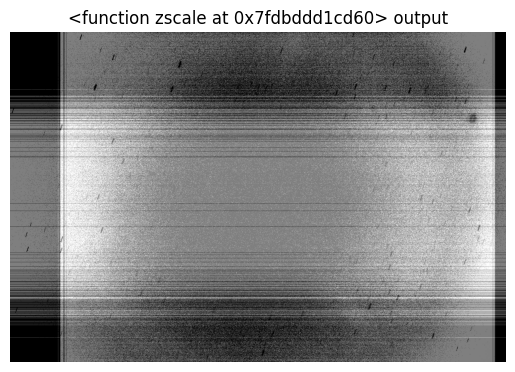

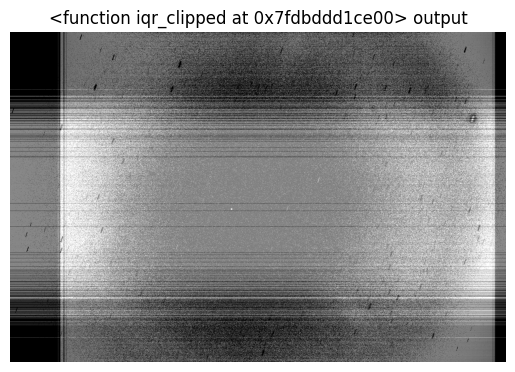

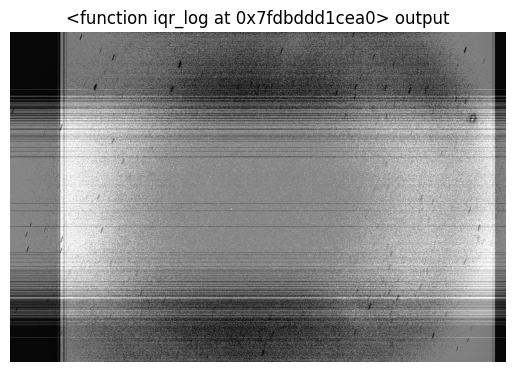

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99777216..1.9964752].


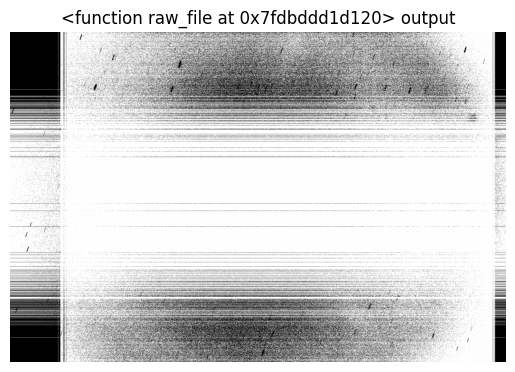

In [3]:

no_bkg = _background_subtract(data)
mrs = _median_row_subtraction(no_bkg)
processed_data = _median_column_subtraction(mrs)

images = [channel_mixture_A(processed_data), channel_mixture_B(processed_data), channel_mixture_C(processed_data), adaptiveIQR(processed_data), zscale(processed_data), iqr_clipped(processed_data), iqr_log(processed_data), raw_file(processed_data)]
functions = [channel_mixture_A, channel_mixture_B, channel_mixture_C, adaptiveIQR, zscale, iqr_clipped, iqr_log, raw_file]

for i, img in enumerate(images):
    # Convert to HWC for matplotlib
    img_hwc = np.transpose(img, (1, 2, 0))

    # Plot
    plt.imshow(img_hwc)
    plt.axis('off')
    plt.title(f"{functions[i]} output")
    plt.show()